<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/TFIDF_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Revisiting Bag of Words

Let's revisit bag of words (BoA) from [the Naive Bayes classifier example](https://github.com/tawfiqam/MI564/blob/main/Naive_Bayes_Intro.ipynb).


The documents:


```
[Today is a great day,Today is a sunny day]
```


BoW = {"Today":2,"great":1,"day":2,"sunny":1}

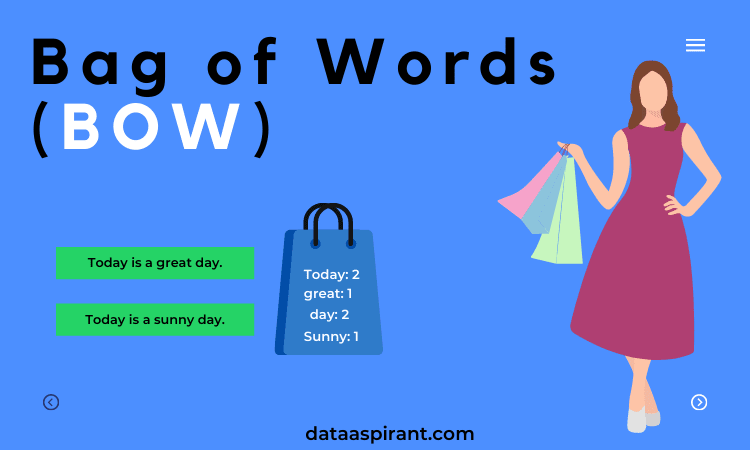

In [ ]:
#nltk is the natural language toolkit https://www.nltk.org/
#it provides a lot of tools needed for NLP analysis
import nltk
#use nltk to get stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
#gensim is a python library used mostly for NLP analysis
#corpora allows us to build a corpus out of different 
#documents
from gensim import corpora
#Defaultdict is a container like dictionaries present in the module collections. 
#Defaultdict is a sub-class of the dict class that returns a dictionary-like object. 
#The functionality of both dictionaries and defualtdict are almost same except for 
#the fact that defualtdict never raises a KeyError. It provides a default value 
#for the key that does not exists.
from collections import defaultdict

#these are the document samples we are going to use here as an example...
documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey"
]

#create a stoplist that includes all the english stop words
stoplist = stopwords.words('english')
display('here is a subset of the stop words')
display(stoplist[0:10])

#Now, let's remove words that are not in the stoplist and change all 
#text to lower case
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once

#first, get the frequncy of each word
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]


#Next, we'll create a gensim dictionary... 
dictionary = corpora.Dictionary(texts)

#and then we create a corpus of different documents
#so, a collection of documents is a corpus (corpora is plural)
corpus = [dictionary.doc2bow(text) for text in texts]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'here is a subset of the stop words'

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
#Let's take a look at how the tokens look like...
print(texts)

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


In [ ]:
#Now...recall that we created a gensim dictionary...
#Let's see what that looks like...
#Notice that each word has a related number, so...
#computer --> 0
#system   --> 5 [there's a reason I point this one out]
print("The dictionary has: " +str(len(dictionary)) + " tokens")
#token.2id shows the features and the ids associated with them...
for k, v in dictionary.token2id.items():
    print(f'{k:{15}} {v:{10}}')

The dictionary has: 12 tokens
computer                 0
human                    1
interface                2
response                 3
survey                   4
system                   5
time                     6
user                     7
eps                      8
trees                    9
graph                   10
minors                  11


In [ ]:
#The corpus contains what we call a word vector
#so each of the document is now described as a tuple
#(token_number,frequency)
#take a look @ the fourth row from the top
#see how 5,systems is counted twice...why is that 
#(take a look at the 4th document from the top in our example)
#"System and human system engineering testing of EPS"
corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

    "System and human system engineering testing of EPS",


#TF-IDF

TFIDF is the Term Frequency-Inverse Document Frequency model. Much like count vectorizer introduced in  is also a bag-of-words model. 

Term frequency-inverse document frequency(tf-idf) that can be used to downweight these frequently occurring words in the feature vectors [PML - P 261].

The difference here is that we are weighting the words so that those words that appear more rarely have a higher weight than those that appear at a higher frequency. Words appearing frequently across documents are less important. Those occuring more rarely, but not too rarely, are more important.

 The output vector will have the same dimensionality but the value of the rare features (at the time of training) will be increased. It basically converts integer-valued vectors into real-valued vectors.

Compute TF-IDF by multiplying a local component (term frequency) with a global component (inverse document frequency), and normalizing the resulting documents to unit length. Formula for non-normalized weight of term i in document j in a corpus of D documents


b51a7ddc6375895ce7cc6aeb2f46dce720ae7ab3.png



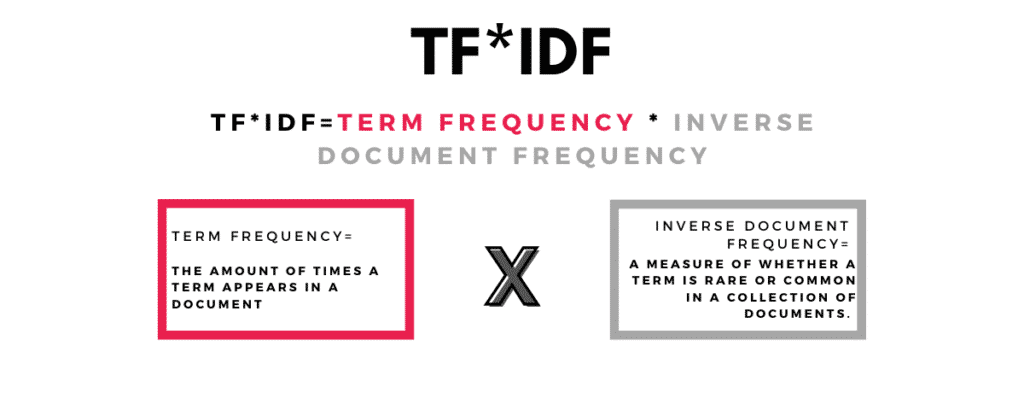

In [ ]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

#now let's fir a TF-IDF model on the corpus
model = TfidfModel(corpus) 

#apply the model to our corpus
corpus_tfidf = model[corpus]

#creating a dictionary that will hold a word and associated weight
topWords = {}

for doc in corpus_tfidf:
    for iWord, tf_idf in doc:
        if iWord not in topWords:
            topWords[iWord] = 0

        if tf_idf > topWords[iWord]:
            topWords[iWord] = tf_idf

wordimportance = []
for i, item in enumerate(sorted(topWords.items(), key=lambda x: x[1], reverse=True), 1):
    wordimportance.append((dictionary[item[0]],item[1]))
    print("%2s: %-13s %s" % (i, dictionary[item[0]], item[1]))
    if i == 100: break

 1: trees         1.0
 2: system        0.7184811607083769
 3: graph         0.7071067811865475
 4: minors        0.695546419520037
 5: response      0.6282580468670046
 6: survey        0.6282580468670046
 7: time          0.6282580468670046
 8: computer      0.5773502691896257
 9: human         0.5773502691896257
10: interface     0.5773502691896257
11: eps           0.5710059809418182
12: user          0.45889394536615247


In [ ]:
model.idfs

{0: 2.1699250014423126,
 1: 2.1699250014423126,
 2: 2.1699250014423126,
 3: 2.1699250014423126,
 4: 2.1699250014423126,
 5: 1.5849625007211563,
 6: 2.1699250014423126,
 7: 1.5849625007211563,
 8: 2.1699250014423126,
 9: 1.5849625007211563,
 10: 1.5849625007211563,
 11: 2.1699250014423126}

In [ ]:
corpus_tfidf.corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

By creating a TF-IDF 

In [ ]:
!pip install psaw

In [ ]:
import pandas as pd
#we will need datetime in order to specify the timeline we need to collect the data
import datetime as dt

#now we import the wrapper in order to use the API
from psaw import PushshiftAPI

api = PushshiftAPI()

In [ ]:
#this function will allow us to find the last day of each month
#for example, there are 31 days in January, but 28 this February
def last_day_of_month(any_day):
    # this will never fail
    # get close to the end of the month for any day, and add 4 days 'over'
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)
    # subtract the number of remaining 'overage' days to get last day of current month, or said programattically said, the previous day of the first of next month
    return next_month - datetime.timedelta(days=next_month.day)

In [ ]:


import datetime
subredditlist = ['Ex_Foster']
for reddit in subredditlist:
    for y in range(2019,2021):
      for i in range(1,12):
          file_name= str(reddit)+"_"+str(y)+"_"+str(i)+".json"
          print("starting with the month "+str(i))
          print("for subreddit..."+str(reddit))
          print("setting start epoch...")
          start_epoch=int(dt.datetime(y, i, 1).timestamp())
          print("setting end epoch...")
          last_day = last_day_of_month(datetime.date(y, i, 1))
          print("the last day of the month is...")
          print(last_day.day)
          last_day = int(last_day.day)
          end_epoch = int(dt.datetime(y,i,last_day).timestamp())
          print("setting up the generator...")
          gen = api.search_comments(after=start_epoch, before=end_epoch,subreddit=reddit)
          print("setting up the dataframe...")
          df = pd.DataFrame([obj.d_ for obj in gen])
          print("The number of comments for year "+ str(y)+" and month "+str(i)+" is "+str(len(df.index)))
          df.to_json(file_name)



starting with the month 1
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 1 is 0
starting with the month 2
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
28
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 2 is 0
starting with the month 3
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 3 is 69
starting with the month 4
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
30
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 4 is 233
starting with the month 5
for sub

/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


The number of comments for year 2019 and month 5 is 119
starting with the month 6
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
30
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 6 is 183
starting with the month 7
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 7 is 78
starting with the month 8
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 8 is 80
starting with the month 9
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
30
setting up the generator...
setting up the dataframe...
The number of comments for yea

In [ ]:
#this function from sklearn allow us to create a TFIDF vector for our text
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

#We'll create a vector here, and as we did before use the stop words provided by sklearn
#Now notice the ngram range. The reason we use the word ngram is that the n can be changed! 
#So, for example, 1-gram is a one word...2-grams is a collection of two words...etc...
#In this example, we're creating a collection that includes between 1 and 3 grams
vectorizer = TfidfVectorizer(ngram_range=(1,3),stop_words=stoplist)
#Fitting the model
X = vectorizer.fit_transform(df['body'])

In [ ]:
#since we have 3 grams (1,2,3), we need to create a dictionary for each
features_by_gram = defaultdict(list)

#zip is a helpful function in python  that aggregates iteratbles in a tuple (list1,list2)
#list one in this case are all the features in the mode, and idf_ The inverse document frequency (IDF) vector
for f, w in zip(vectorizer.get_feature_names(), vectorizer.idf_):
    features_by_gram[len(f.split(' '))].append((f, w))

In [ ]:
#lets get the top tokens for each of the grams
top_n = 20

#for each of the grams, we want to get the top features
for gram, features in features_by_gram.items():
    #get sorted top features
    top_features = sorted(features, key=lambda x: x[1], reverse=False)[:top_n]
    #get the top features and their weights
    #now just focus on getting the first element of the tuple
    top_features = [f[0] for f in top_features]
    print('{}-gram top:'.format(gram), top_features)

1-gram top: ['like', 'know', 'sorry', 'people', 'family', 'going', 'life', 'good', 'want', 'care', 'foster', 'really', 'say', 'better', 'even', 'love', 'things', 'feel', 'get', 'help']
2-gram top: ['foster care', 'sounds like', 'even though', 'put username', 'sorry loss', 'feel free', 'feels like', 'easier said', 'feel like', 'former foster', 'foster youth', 'go back', 'people know', 'said done', 'sorry going', 'wish best', '20 years', 'beautiful day', 'buy something', 'care even']
3-gram top: ['easier said done', 'ever need someone', 'feel free dm', 'one year care', '10 years like', '10x definitely blessing', '12 best answers', '13 years hurts', '14 imagining future', '16 especially home', '16 matter wonderful', '18 held resentment', '18 moved another', '20 years ago', '20 years every', '20s man felt', '25 still close', '30 hard resentful', '34 still get', '70 horses boys']


In [ ]:
#lets get the top tokens for each of the grams
top_n = 20

#for each of the grams, we want to get the top features
for gram, features in features_by_gram.items():
    #get sorted top features
    top_features = sorted(features, key=lambda x: x[1], reverse=False)[:top_n]
    #get the top features and their weights
    display(top_features[0:5])
    display(50*'*')
    #now just focus on getting the first element of the tuple
    top_features = [f[0] for f in top_features]
    display(top_features[0:5])
    display(50*'*')
    print('{}-gram top:'.format(gram), top_features)
    display(50*'*')
    display(50*'*')
    display(50*'*')

[('like', 2.2139231351791038),
 ('know', 2.570598079117836),
 ('sorry', 2.570598079117836),
 ('people', 2.670681537674819),
 ('family', 2.7819071727850435)]

'**************************************************'

['like', 'know', 'sorry', 'people', 'family']

'**************************************************'

1-gram top: ['like', 'know', 'sorry', 'people', 'family', 'going', 'life', 'good', 'want', 'care', 'foster', 'really', 'say', 'better', 'even', 'love', 'things', 'feel', 'get', 'help']


'**************************************************'

'**************************************************'

'**************************************************'

[('foster care', 3.5356789751614235),
 ('sounds like', 3.5356789751614235),
 ('even though', 3.8233610476132043),
 ('put username', 3.8233610476132043),
 ('sorry loss', 3.8233610476132043)]

'**************************************************'

['foster care', 'sounds like', 'even though', 'put username', 'sorry loss']

'**************************************************'

2-gram top: ['foster care', 'sounds like', 'even though', 'put username', 'sorry loss', 'feel free', 'feels like', 'easier said', 'feel like', 'former foster', 'foster youth', 'go back', 'people know', 'said done', 'sorry going', 'wish best', '20 years', 'beautiful day', 'buy something', 'care even']


'**************************************************'

'**************************************************'

'**************************************************'

[('easier said done', 4.228826155721369),
 ('ever need someone', 4.51650822817315),
 ('feel free dm', 4.51650822817315),
 ('one year care', 4.51650822817315),
 ('10 years like', 4.921973336281314)]

'**************************************************'

['easier said done',
 'ever need someone',
 'feel free dm',
 'one year care',
 '10 years like']

'**************************************************'

3-gram top: ['easier said done', 'ever need someone', 'feel free dm', 'one year care', '10 years like', '10x definitely blessing', '12 best answers', '13 years hurts', '14 imagining future', '16 especially home', '16 matter wonderful', '18 held resentment', '18 moved another', '20 years ago', '20 years every', '20s man felt', '25 still close', '30 hard resentful', '34 still get', '70 horses boys']


'**************************************************'

'**************************************************'

'**************************************************'